## Task 1.1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import os 
from PIL import Image
import cv2 

def center(images):
    newImages = images - np.mean(images, axis = 0)
    return newImages

def standardize(images):
    newImages = center(images)/np.std(images, axis = 0)
    return newImages

def printAll(category_images, category, axes): 
    for i, img in enumerate(category_images):
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"{category} - Image {i+1}")
        axes[i].axis('off')
    plt.show()

def whiten(images):
    num_samples, height, width, num_channels = images.shape
    images_reshaped = np.reshape(images, (num_samples, -1))

    # Center the data
    mean_images = np.mean(images_reshaped, axis=0)
    centered_images = images_reshaped - mean_images

    # Calculate the covariance matrix
    cov_matrix = np.cov(centered_images, rowvar=False)

    # Perform PCA
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Whitening transformation matrix
    whitening_matrix = np.diag(1.0 / np.sqrt(eigenvalues + 1e-5))

    # Apply whitening transformation
    whitened_images = np.dot(np.dot(centered_images, eigenvectors), whitening_matrix).dot(eigenvectors.T)

    # Reshape the whitened images back to original shape
    whitened_images = np.reshape(whitened_images, (num_samples, height, width, num_channels))

    return whitened_images


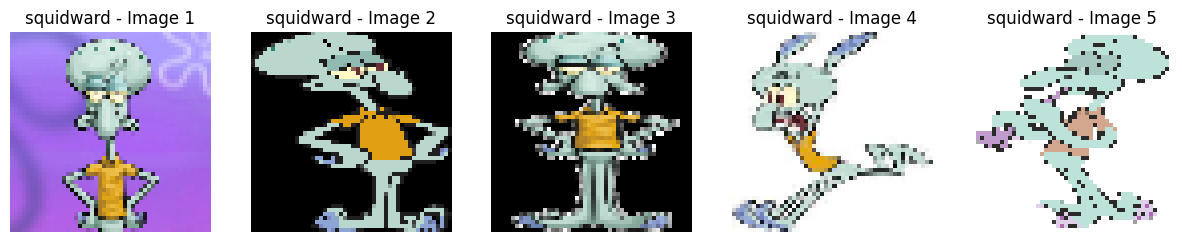

(25, 50, 50, 3)


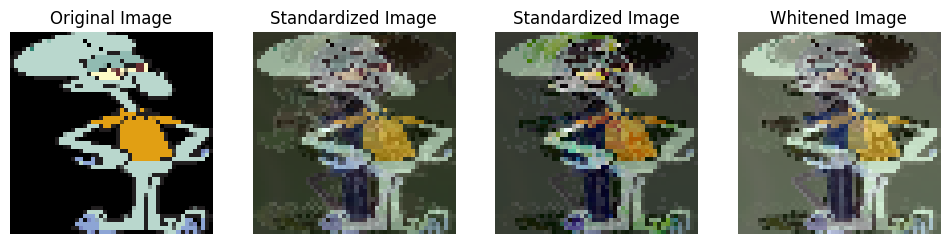

In [11]:

data_dir = "C:\\Users\\malko\\Desktop\\Skola\\D7041E-labs\\lab1\\pictures"
categories = os.listdir(data_dir)
x, y = 50, 50
all_images = []
for category in categories:
    category_path = os.path.join(data_dir, category)
    category_images = []

    for filename in os.listdir(category_path):
        img_path = os.path.join(category_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (x, y))
        category_images.append(img)
        all_images.append(img)

    

# Create a single row of subplots for each category
num_images = len(category_images)
fig, axes = plt.subplots(1, num_images, figsize=(15, 3)) 
printAll(category_images, category, axes)
all_images_np = np.array(all_images)
print(all_images_np.shape)



category_images_np = np.array(category_images)
whitened_category_images = whiten(category_images_np)

i= 1
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(category_images[i], cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
centered_image = center(category_images_np)[i]
centered_image = ((centered_image - centered_image.min()) * (1/(centered_image.max() - centered_image.min()) * 255)).astype('uint8')
plt.imshow(cv2.cvtColor(centered_image, cv2.COLOR_BGR2RGB))
plt.title("Centered Image")
plt.axis('off')

plt.subplot(1, 4, 3)
standardized_image = standardize(category_images_np)[i]
standardized_image = ((standardized_image - standardized_image.min()) * (1/(standardized_image.max() - standardized_image.min()) * 255)).astype('uint8')
plt.imshow(cv2.cvtColor(standardized_image, cv2.COLOR_BGR2RGB))
plt.title("Standardized Image")
plt.axis('off')

plt.subplot(1, 4, 4)
whitened_image = whitened_category_images[i]
whitened_image = ((whitened_image - whitened_image.min()) * (1/(whitened_image.max() - whitened_image.min()) * 255)).astype('uint8')
plt.imshow(cv2.cvtColor(whitened_image, cv2.COLOR_BGR2RGB))
plt.title("Whitened Image")
plt.axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


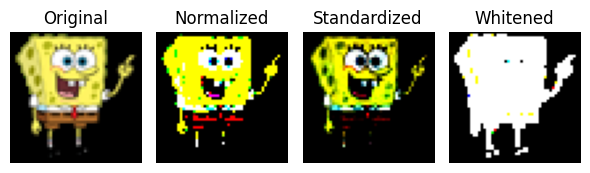

In [8]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn import svm, datasets

#Constants
DATASET_DIR = 'C:\\Users\\malko\\Desktop\\Skola\\D7041E-labs\\lab1\\pictures'
CATEGORIES = ["spongebob", "squidward", "patrick", "mrkrabs", "plankton"]
DESIRED_SIZE = (50, 50)

#Load the dataset
def load_dataset():
    data = []
    for category in CATEGORIES:
        path = os.path.join(DATASET_DIR, category)
        label = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = Image.open(img_path).resize(DESIRED_SIZE).convert('RGB')
            image = np.array(image)
            data.append([image, label])
    np.random.shuffle(data)
    images = np.array([item[0] for item in data])
    labels = np.array([item[1] for item in data])
    return images, labels

#Pre-processing functions
#Normalization
def center(images):
    return images - np.mean(images, axis=0)

#Stanardization
def standardize(images):
    centered_images = center(images)
    return centered_images / np.std(centered_images, axis=0)

#Whitening 
def whiten(images):
    original_shape = images.shape
    flattened_images = images.reshape(original_shape[0], -1)
    pca = PCA(whiten=True)
    whitened = pca.fit_transform(flattened_images)
    reconstructed = pca.inverse_transform(whitened)
    return reconstructed.reshape(original_shape)
#Plotting functions
def plot_sample(images, labels, index):
    plt.imshow(images[index])
    plt.title(CATEGORIES[labels[index]])
    plt.show()

def plot_all(original_image, images_list, labels_list):
    num_images = len(images_list)
    plt.figure(figsize=(2*num_images, 2))  # Change the figure size

#Plotting the original image
    plt.subplot(1, num_images + 1, 1)  # Change the subplot arrangement
    plt.imshow(original_image)
    plt.title("Original")
    plt.axis('off')

#Plotting the processed images
    for i, (image, label) in enumerate(zip(images_list, labels_list)):
        plt.subplot(1, num_images + 1, i + 2)  # Change the subplot arrangement
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

#Main function
def main():
    images, labels = load_dataset()
    images_centered = center(images)
    images_standardized = standardize(images)
    images_whitened = whiten(images)
    images_list = [images_centered[3], images_standardized[3], images_whitened[3]]
    labels_list = ["Normalized", "Standardized", "Whitened"]
    plot_all(images[3], images_list, labels_list)

main()

In [6]:
from keras.datasets import mnist

ModuleNotFoundError: No module named 'keras'

In [3]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [4]:
Xtr.shape

(60000, 28, 28)

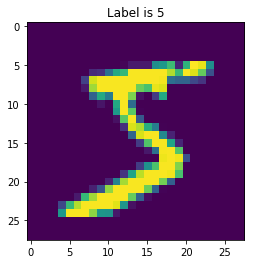

In [5]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


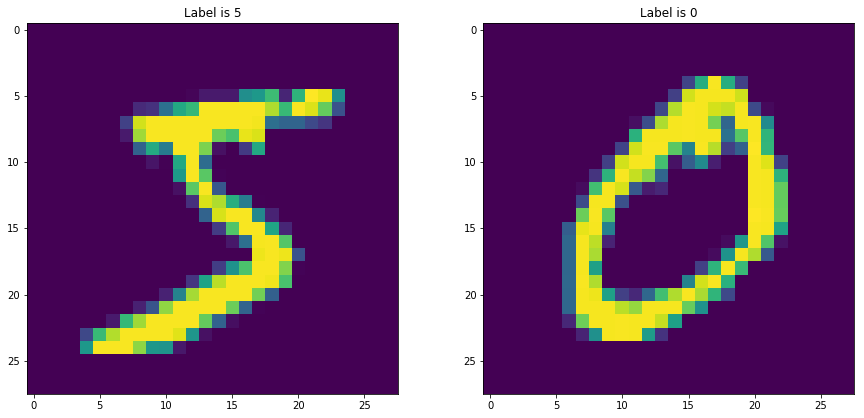

In [6]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [7]:
28*28

784

In [14]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype()
Tr_set.shape

(500, 784)

In [12]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [13]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



Accuracy: 0.811
